In [13]:
import os
import pickle

import matplotlib.pyplot as plt

In [2]:
filename = "experiments/20210930145746_seq_agent_002/log.pkl"
with open(filename, "rb") as f:
    data = pickle.load(f)

In [3]:
[key for key in data.keys() if key[0].islower()]

['backgrounds',
 'background',
 'beams',
 'beam',
 'screen_data',
 'observation',
 'action',
 'time',
 'history',
 'model_name',
 'target_delta']

In [ ]:
data["beams"][0].shape

In [5]:
test = data["beams"][34][3]

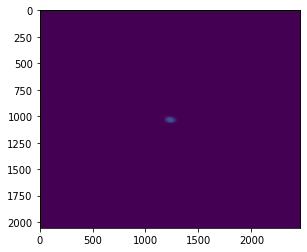

In [6]:
plt.imshow(test)
plt.show()

In [7]:
for key in ["backgrounds", "beams"]:
    data[key] = [img[:,1:-1,1:-1].reshape(10, 513, 2054//513, 615, 2462//615).mean(-1).mean(2) for img in data[key]]

In [8]:
data["beams"][0].shape

(10, 513, 615)

In [9]:
for key in ["background", "beam", "screen_data"]:
    data[key] = [img[1:-1,1:-1].reshape(513, 2054//513, 615, 2462//615).mean(-1).mean(1) for img in data[key]]

In [10]:
data["beam"][0].shape

(513, 615)

In [11]:
test = data["beams"][34][3]

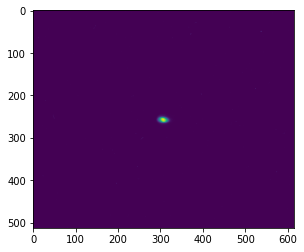

In [12]:
plt.imshow(test)
plt.show()

In [18]:
os.mkdir("experiments/20210930145746_seq_agent_002_rebinned")
with open("experiments/20210930145746_seq_agent_002_rebinned/log.pkl", "wb") as f:
    pickle.dump(data, f)